In [1]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import xarray as xr

# Load shapefile of state boundary for geo context
usa = gpd.read_file(r'Z:\Data-Expansion\users\lelise\data\geospatial\boundary\us_boundary\cb_2018_us_state_500k\cb_2018_us_state_500k.shp')

Index(['tc_id', 'max_total_precip_cell', 'cumm_precip_domain',
       'max_rain_rate'],
      dtype='object')
<xarray.Dataset> Size: 55MB
Dimensions:      (run: 313, y: 121, x: 181)
Coordinates:
  * x            (x) float64 1kB -84.0 -83.95 -83.9 ... -75.1 -75.05 -75.0
  * y            (y) float64 968B 31.0 31.05 31.1 31.15 ... 36.9 36.95 37.0
  * run          (run) float64 3kB 2.0 19.0 50.0 ... 4.966e+03 5.004e+03
Data variables:
    precip       (run, y, x) float64 55MB ...
    spatial_ref  (run) int64 3kB ...


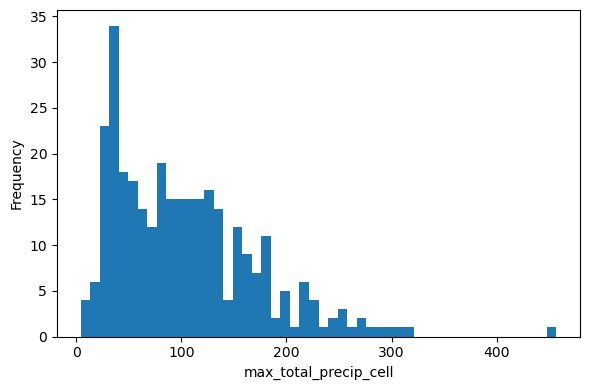

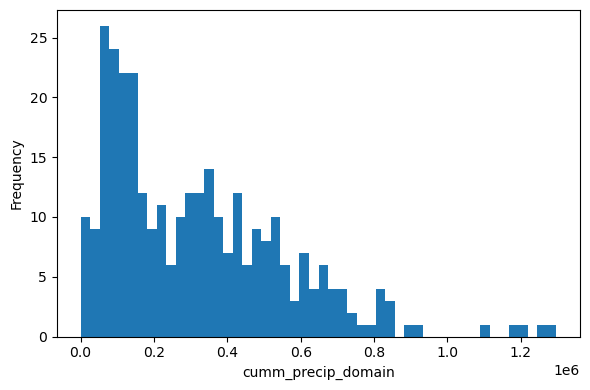

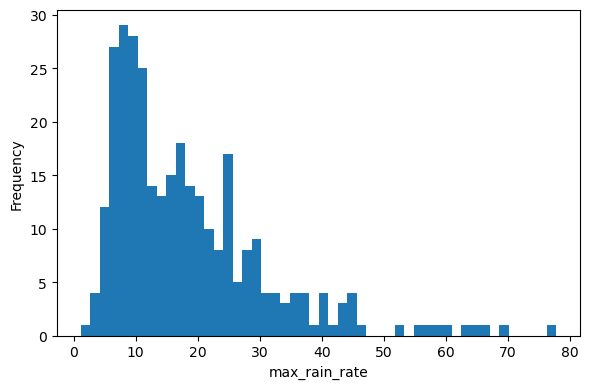

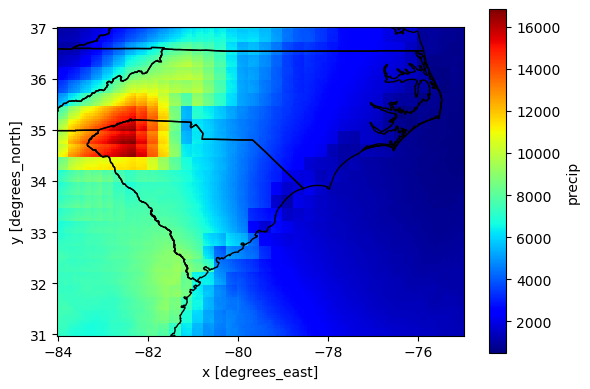

In [5]:
os.chdir(r'Z:\Data-Expansion\users\lelise\Chapter3\NCEP_Reanalysis\rain\noSurge_TCs_within200kmBuffer')

# Read in CSV with TC rainfall stats and total precipitation grids generated using calc_Tc_precip_stats.py
tc_rain_info = pd.read_csv('tc_rain_info.csv', index_col=None)
print(tc_rain_info.columns)

tot_precip_grids = xr.open_dataset('TC_TotPrecip_grids.nc')
print(tot_precip_grids)

var = 'max_total_precip_cell'
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(6, 4), tight_layout=True)
tc_rain_info[var].plot.hist(bins=50, xlabel = var)
plt.savefig(f'{var}.png')

var = 'cumm_precip_domain'
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(6, 4), tight_layout=True)
tc_rain_info[var].plot.hist(bins=50, xlabel = var)
plt.savefig(f'{var}.png')

var = 'max_rain_rate'
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(6, 4), tight_layout=True)
tc_rain_info[var].plot.hist(bins=50, xlabel = var)
plt.savefig(f'{var}.png')

# Sum the storm total precip
tot_rain = tot_precip_grids.sum(dim='run')['precip']

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(6, 4), tight_layout=True)
tot_rain.plot(ax=ax, cmap='jet')
usa.geometry.plot(ax=ax, color='none', edgecolor='black')
plt.savefig('tot_precip_all_TCs.png')